C:\Users\tarak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Random Forest Model Evaluation:
Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:


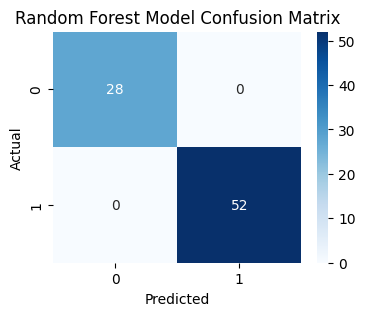


XGBoost Model Evaluation:
Accuracy: 98.75
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix:


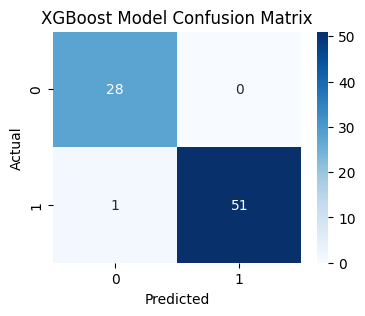

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import warnings

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load the updated dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('patients400_dataset_cleaned_all.csv')

# Define feature columns and target variable
# Assuming 'Class' is the target variable (1: ckd, 0: notckd)
selected_features = ['Age','Specific Gravity', 'Albumin', 'Blood Glucose Random',
       'Serum Creatinine', 'Sodium', 'Hemoglobin', 'Packed  Cell Volume',
       'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus']

# Filter data for selected features
X = df[selected_features]

y = df['Class']
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler_400.pkl")  # Save the scaler

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
patient_data = np.array([[23, 1.020, 3, 120, 1.5, 138, 13.5, 46, 5.2, 1, 0]])
patient_data_scaled = scaler.transform(patient_data)
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_predictions = rf_model.predict(X_test)

patient_prediction = rf_model.predict(patient_data_scaled)
prediction_label = "CKD Detected" if patient_prediction[0] == 1 else "No CKD"

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluate both models

# Random Forest Evaluation
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)*100}")

print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Model Confusion Matrix')
plt.show()

# XGBoost Evaluation
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)*100}")
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Model Confusion Matrix')
plt.show()



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6838 - loss: 0.6229 - val_accuracy: 0.9875 - val_loss: 0.3530
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9711 - loss: 0.3171 - val_accuracy: 0.9875 - val_loss: 0.1595
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9699 - loss: 0.1653 - val_accuracy: 1.0000 - val_loss: 0.0707
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.0862 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss: 0.0242
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9957 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9870 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9847 - loss: 0.0307 - val_accuracy: 1.0000 - v

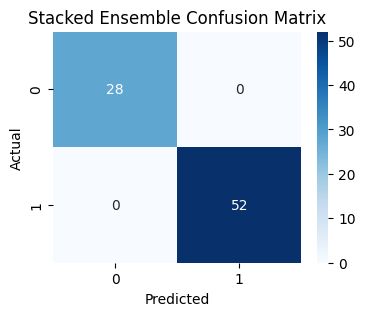

Random Forest model saved successfully at random_forest_ckd_model.pkl


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)
# Define Neural Network Model
def create_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(len(np.unique(y_encoded)), activation='softmax')  # Multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Neural Network
nn_model = create_nn_model(X_train.shape[1])
history=nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Get NN predictions
nn_predictions_train = nn_model.predict(X_train)
nn_predictions_test = nn_model.predict(X_test)

# Get XGBoost predictions
xgb_predictions_train = xgb_model.predict_proba(X_train)
xgb_predictions_test = xgb_model.predict_proba(X_test)

# Stack predictions
stacked_train = np.hstack([nn_predictions_train, xgb_predictions_train])
stacked_test = np.hstack([nn_predictions_test, xgb_predictions_test])

# Train Meta-Model
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_train, y_train)
final_predictions = meta_model.predict(stacked_test)

print("\nStacked Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions)*100}")
# Evaluate Stacked Model
print("\nStacked Model Classification Report:")
print(classification_report(y_test, final_predictions))
print("\nStacked Model Confusion Matrix:")
print(confusion_matrix(y_test, final_predictions))

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, final_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacked Ensemble Confusion Matrix')
plt.show()

# Save the trained Random Forest model
model_path = "random_forest_ckd_model.pkl"
joblib.dump(xgb_model, model_path)

print(f"Random Forest model saved successfully at {model_path}")